In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

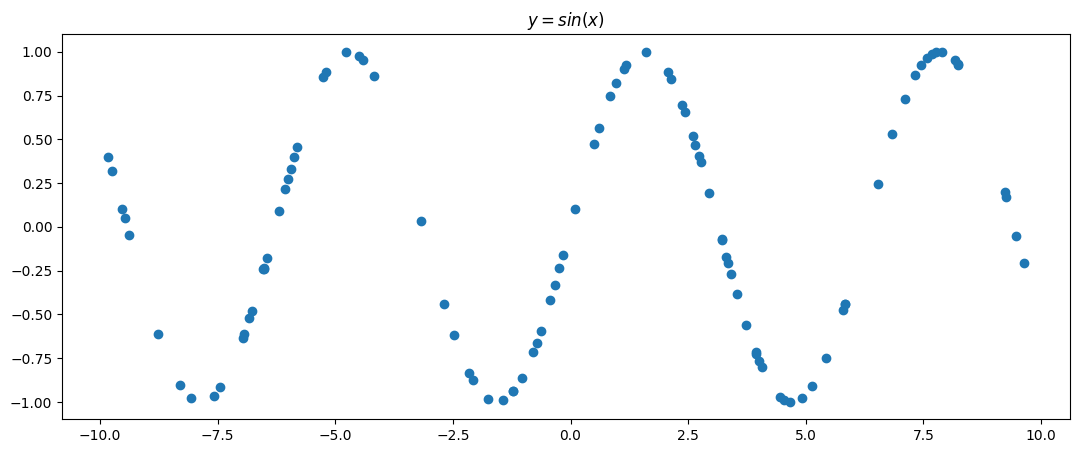

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

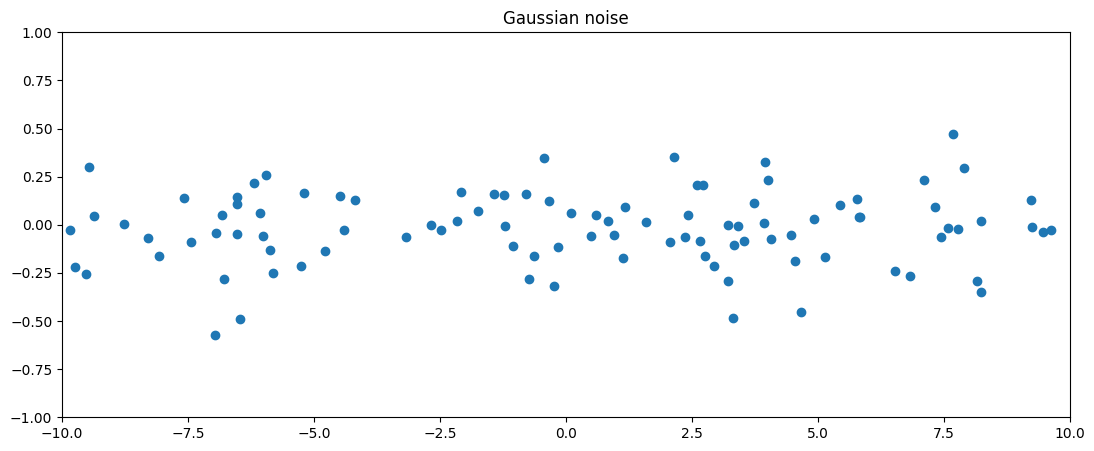

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

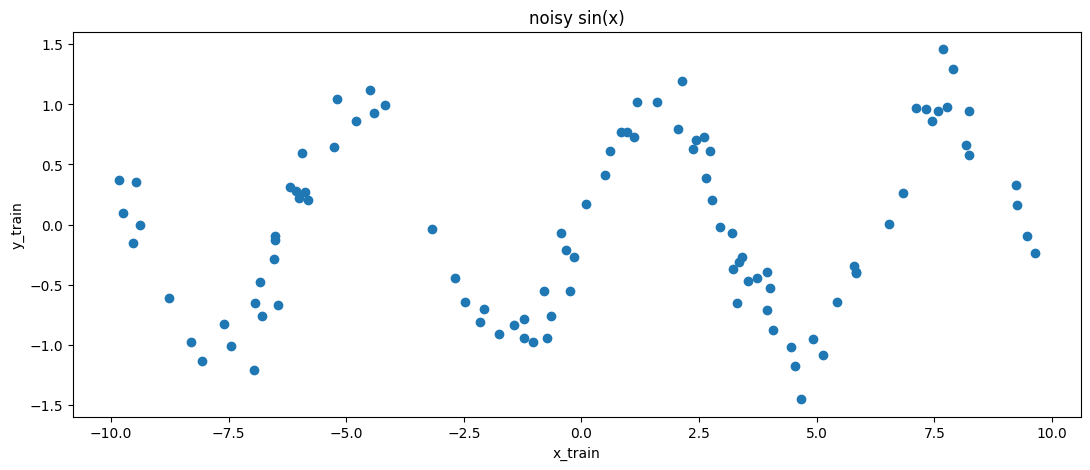

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


In [8]:
x_train

tensor([[-0.7956],
        [-0.6380],
        [-0.1596],
        [-4.1804],
        [ 7.1033],
        [ 5.4387],
        [-6.8324],
        [ 7.9060],
        [-2.0725],
        [-8.0755],
        [-3.1747],
        [-0.3382],
        [ 8.2365],
        [ 3.3468],
        [ 9.2513],
        [-0.2351],
        [-6.0045],
        [ 7.3305],
        [ 7.5785],
        [ 2.6532],
        [ 0.9608],
        [ 1.5969],
        [ 2.0610],
        [ 3.9509],
        [ 3.9406],
        [ 2.1387],
        [ 1.1266],
        [-4.7834],
        [-6.5271],
        [-4.4064],
        [-1.0408],
        [-0.7236],
        [ 0.8437],
        [ 7.6909],
        [-9.3765],
        [ 7.7778],
        [ 5.1385],
        [ 8.1668],
        [-1.2147],
        [-7.5893],
        [-2.6827],
        [ 2.3734],
        [ 9.6348],
        [-9.7484],
        [-2.4735],
        [ 6.8393],
        [ 3.2091],
        [-6.5254],
        [ 0.1051],
        [-1.2204],
        [ 9.2262],
        [ 3.4117],
        [-1.

# Validation dataset

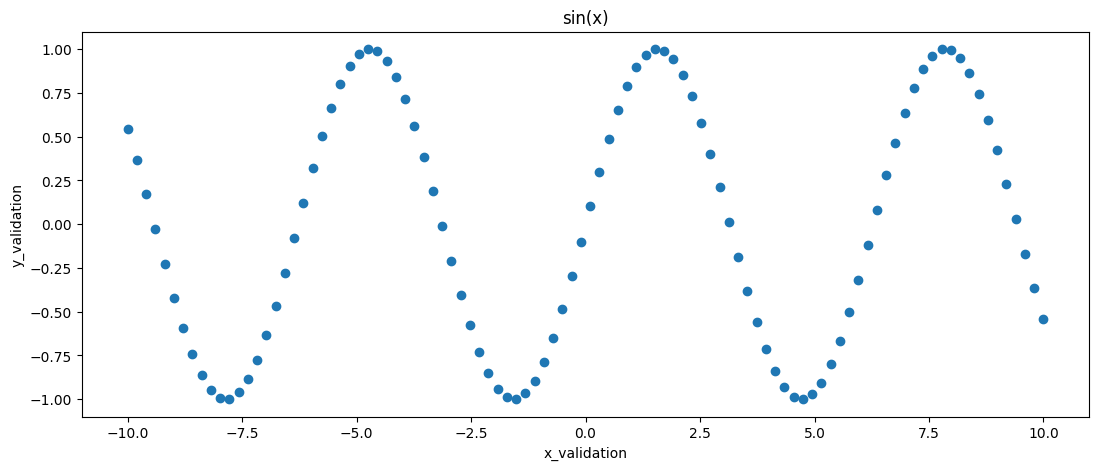

In [9]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [10]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [11]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        """
        We describe and initialize the layers of the neural network
        """
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        """
        We describe the forward pass of the neural network
        """
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)

        return x

sine_net = SineNet(30)

# Prediction

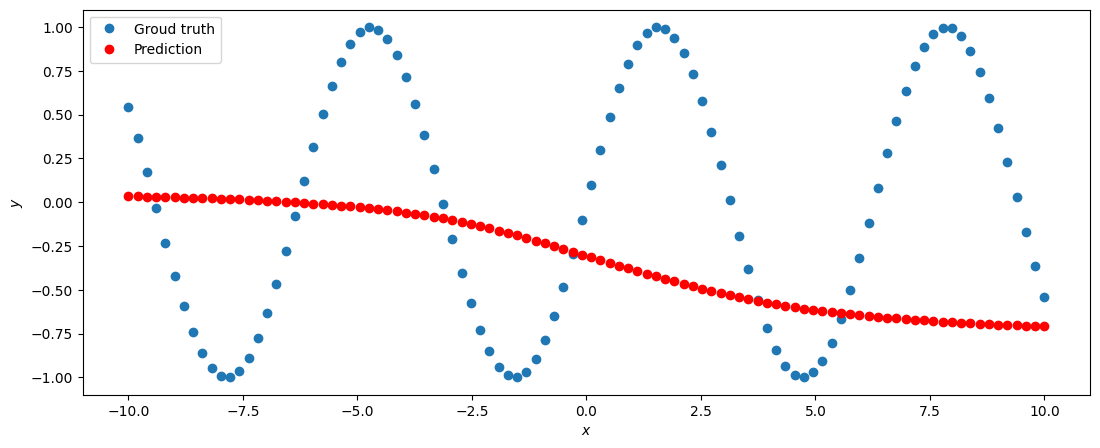

In [12]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [13]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [14]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

# Training procedure

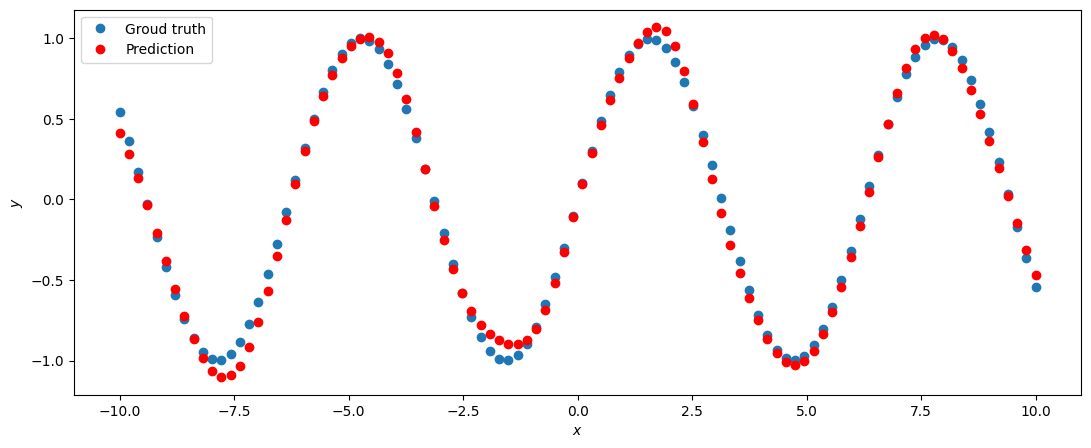

In [15]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

# Home  Work Part 1

We train a neural network for a regression problem:

Let's take a more complex function as a target: $$y=2^xsin(2^{-x})$$

In addition, we want to get a good MAE metric for validation: $$MAE=1/l\sum_{i=1}^{l}|y\_pred_i - y\_target_i|$$

whereas the familiar MSE looks like $$MSE=1/l\sum_{i=1}^{l}(y\_pred_i - y\_target_i)^2$$

What can be varied:

1) Network architecture

2) loss function

3) lr optimizer

4) Number of epochs in training

In [16]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.ReLU() # Using ReLU activation
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

# You can adjust the number of hidden neurons
net = RegressionNet(50)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

# You can adjust the learning rate
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Mean Absolute Error loss function
def loss(pred, target):
    return (pred - target).abs().mean()

# You can adjust the number of epochs
epochs = 4000

for epoch_index in range(epochs):
    optimizer.zero_grad()

    y_pred = net.forward(x_train) # make forward
    loss_value = loss(y_pred, y_train)
    loss_value.backward() # make backward
    optimizer.step() # make step

    # Print loss every 500 epochs
    if (epoch_index + 1) % 500 == 0:
        print(f'Epoch [{epoch_index+1}/{epochs}], Loss: {loss_value.item():.4f}')


# The check is carried out by calling the code:
def metric(pred, target):
    return (pred - target).abs().mean()

# Calculate MAE on validation set after training
with torch.no_grad(): # Disable gradient calculation for evaluation
    y_validation_pred = net(x_validation)
    mae_validation = metric(y_validation_pred, y_validation)
    print(f'\nValidation MAE: {mae_validation.item():.4f}')

Epoch [500/4000], Loss: 0.0409
Epoch [1000/4000], Loss: 0.0402
Epoch [1500/4000], Loss: 0.0381
Epoch [2000/4000], Loss: 0.0335
Epoch [2500/4000], Loss: 0.0317
Epoch [3000/4000], Loss: 0.0315
Epoch [3500/4000], Loss: 0.0394
Epoch [4000/4000], Loss: 0.0302

Validation MAE: 0.0275
